0.7868852459016393
1.0
0.7868852459016393


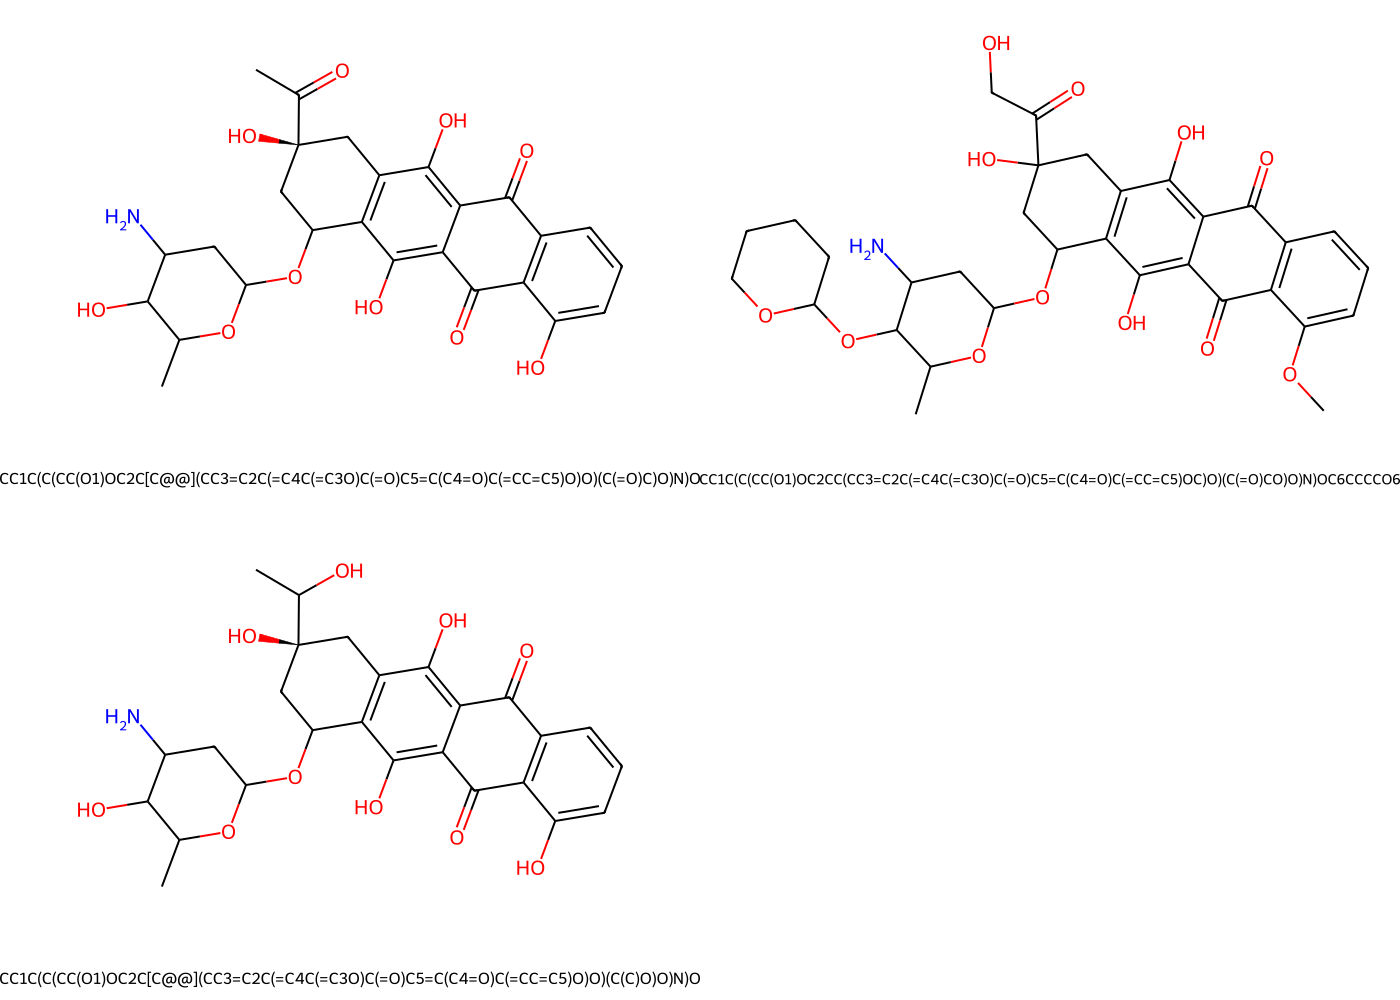

In [10]:
from rdkit import Chem, DataStructs
from rdkit.Chem import Draw, AllChem, MACCSkeys
import matplotlib as mpl
import numpy as np
"""
smi = "C[C@H]([C@@H](C(=O)O)NC(=O)[C@H](CCC(=O)O)NC(=O)CNC(=O)[C@H](CCCCN)NC(=O)[C@@H]1CCCN1C(=O)CNC(=O)[C@H](CCC(=O)N)NC(=O)[C@H](CCC(=O)O)NC(=O)CNC(=O)[C@H](CC[C@H](CN)O[C@H]2[C@@H]([C@H]([C@H]([C@H](O2)CO)O)O)O)NC(=O)[C@H](CC3=CSC=N3)NC(=O)CNC(=O)[C@H](C)NC(=O)[C@H](CCC(=O)N)NC(=O)CN)O"
#colors = [mpl.colormaps['YlOrBr'](0.2 * i)[:3] for i in range(1, 5)]
mol = Chem.MolFromSmiles(smi)
img = Draw.MolsToGridImage([mol], legends=[smi], molsPerRow=1, subImgSize=(1200, 500))
display(img)
"""
#CC(=O)N[C@H](CCC[C@@H]1C(=O)N[C@H]C(=O)N[C@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)N1)CCCN(C(=O)C)O)CCCN(C(=[OH+])C)C)O)O.[Fe]

smis = ["CC1C(C(CC(O1)OC2C[C@@](CC3=C2C(=C4C(=C3O)C(=O)C5=C(C4=O)C(=CC=C5)O)O)(C(=O)C)O)N)O",
"CC1C(C(CC(O1)OC2CC(CC3=C2C(=C4C(=C3O)C(=O)C5=C(C4=O)C(=CC=C5)OC)O)(C(=O)CO)O)N)OC6CCCCO6",
"CC1C(C(CC(O1)OC2C[C@@](CC3=C2C(=C4C(=C3O)C(=O)C5=C(C4=O)C(=CC=C5)O)O)(C(C)O)O)N)O",]

mols = [Chem.MolFromSmiles(smi) for smi in smis]
print(DataStructs.FingerprintSimilarity(MACCSkeys.GenMACCSKeys(mols[0]), MACCSkeys.GenMACCSKeys(mols[1]), metric=DataStructs.TanimotoSimilarity))
print(DataStructs.FingerprintSimilarity(MACCSkeys.GenMACCSKeys(mols[0]), MACCSkeys.GenMACCSKeys(mols[2]), metric=DataStructs.TanimotoSimilarity))
print(DataStructs.FingerprintSimilarity(MACCSkeys.GenMACCSKeys(mols[1]), MACCSkeys.GenMACCSKeys(mols[2]), metric=DataStructs.TanimotoSimilarity))
#print(DataStructs.TanimotoSimilarity(AllChem.GetMorganFingerprint(mols[1], 2), AllChem.GetMorganFingerprint(mols[3], 2)))

img = Draw.MolsToGridImage(mols, legends=smis, molsPerRow=2, subImgSize=(700, 500))
display(img)

In [14]:
from rdkit import DataStructs
from rdkit.Chem import AllChem, MACCSkeys

with open("../../assets/text2smi/molt5-smi.txt", "r") as f:
    for i, line in enumerate(f.readlines()):
        if i == 0:
            continue
        line = line.rstrip("\n").split("\t")
        if i % 10 == 0:
            gt = line[1]
            pred = line[2]
            try:
                gt_mol = Chem.MolFromSmiles(gt)
                pred_mol = Chem.MolFromSmiles(pred)
                print(gt, pred, DataStructs.TanimotoSimilarity(AllChem.GetMorganFingerprint(gt_mol, 2), AllChem.GetMorganFingerprint(pred_mol, 2)))
            except:
                print("Invalid SMILES")

CC1=C2C=C(C=C(C2=CC=C1)C(=O)O)[O-] CC1=C2C=CC(=C(C2=CC=C1)C(=O)O)[O-] 0.5769230769230769
C(CCC[C@H](CC(=O)O)O)CCCO C(CCCCCC(=O)O)CCCCO 0.54
CSC[C@@H]1[C@@H]([C@H]([C@H](O1)O[C@@H]2[C@H](O[C@@H]([C@H]([C@H]2O)O)OC[C@@H]3[C@H]([C@@H]([C@@H](O3)O[C@H]4[C@@H]([C@H](O[C@@H]4OC[C@@H]5[C@H]([C@@H]([C@H](O5)OC[C@@H]6[C@H]([C@@H](C(O6)O)O)O)O)O[C@@H]7[C@H]([C@@H]([C@H](O7)CO)O)O[C@H]8[C@H]([C@@H]([C@H](O8)CO)O)O)CO)O)O)O)CO)O)O CSC[C@@H]1[C@@H]([C@H]([C@H](O1)O[C@@H]2[C@H](O[C@@H]([C@H]([C@H]2O)O)OC[C@@H]3[C@H]([C@@H]([C@@H](O3)O[C@H]4[C@@H]([C@H](O[C@@H]4O[C@@H]5[C@H](O[C@@H]([C@H]5O)OC[C@@H]6[C@H]([C@@H](C(O6)O)O)O)CO[C@@H]7[C@H]([C@@H]([C@H](O7)CO)O)O[C@H]8[C@H]([C@@H]([C@H](O8)CO)O)O)CO)O)O)O)CO)O)O 1.0
CC1=CC(=O)C(=C(C1=O)O)OC CC1=C(C(=O)C(=C(C1=O)OC)O)C/C=C(C)/CCC=C(C)C 0.3283582089552239
C(CN)[C@H](C[C@@H](C(=O)O)N)O C(C[C@@H](C(=O)O)N)O 0.45454545454545453
CC(C)CCCCCCCCCCCC(=O)[O-] CC(C)CCCCCCCCCCCCCC(=O)[O-] 0.8867924528301887
C([C@@H]1[C@H]([C@@H]([C@H]([C@H](O1)O[C@@H]2[C@H](O[C@@H](

[09:23:01] SMILES Parse Error: unclosed ring for input: 'C[C@H]1[C@@H]([C@H](C[C@@H](O1)O[C@@H]2[C@H](C3=CC=CC=C3)C(=O)OC)C4=CC=C(C=C4)Cl)C'
[09:23:01] SMILES Parse Error: extra close parentheses while parsing: C[C@@H]([C@H]1CC[C@@H]2[C@@]1(CC[C@H]3[C@H]2CC[C@@H]4[C@@]3(CCC(=O)C4)C)O)C)O)O
[09:23:01] SMILES Parse Error: Failed parsing SMILES 'C[C@@H]([C@H]1CC[C@@H]2[C@@]1(CC[C@H]3[C@H]2CC[C@@H]4[C@@]3(CCC(=O)C4)C)O)C)O)O' for input: 'C[C@@H]([C@H]1CC[C@@H]2[C@@]1(CC[C@H]3[C@H]2CC[C@@H]4[C@@]3(CCC(=O)C4)C)O)C)O)O'
[09:23:01] SMILES Parse Error: extra open parentheses for input: 'C1C[C@H](N(C1)C(=O)[C@@H]2CCCN2C(=O)[C@H](CC3=CC=C(C=C3)O)NC(=O)[C@H](C(C)C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](C(C)C)NC(=O)[C@H](CCC(=O)N[C@@H](CC4=CC=CC=C4)C(=O)N'
[09:23:01] SMILES Parse Error: extra open parentheses for input: 'C1[C@H]([C@@H]([C@H]([C@@H](O1)O[C@@H]2[C@H]([C@@H]([C@H](O[C@H]2O[C@@H]3[C@H]([C@@H]([C@H](O[C@H]3OC4=C(C(=CC(=C4)O)O)O)O)O)O)O'
[09:23:01] SMILES Parse Error: extra open parentheses for 

In [1]:
import numpy as np

a={'mrr_d2t': 0.1558791764119896, 'mrr_t2d': 0.14965950363471778, 'rec@1_d2t': 0.09986504723346828, 'rec@1_t2d': 0.09086819613135402, 'rec@5_d2t': 0.20287899235267656, 'rec@5_t2d': 0.200629779577148, 'rec@10_d2t': 0.2564102564102564, 'rec@10_t2d': 0.2595591542959964}
b={'mrr_d2t': 0.15275898047922648, 'mrr_t2d': 0.15137478810357613, 'rec@1_d2t': 0.09446693657219973, 'rec@1_t2d': 0.09266756635177688, 'rec@5_d2t': 0.20422852001799371, 'rec@5_t2d': 0.20512820512820512, 'rec@10_d2t': 0.2627080521817364, 'rec@10_t2d': 0.2613585245164193}
c={'mrr_d2t': 0.12878077403915172, 'mrr_t2d': 0.1280663235812405, 'rec@1_d2t': 0.0728744939271255, 'rec@1_t2d': 0.07467386414754835, 'rec@5_d2t': 0.17453891138101665, 'rec@5_t2d': 0.16779127305443095, 'rec@10_d2t': 0.2388663967611336, 'rec@10_t2d': 0.22807017543859648}
d={'mrr_d2t': 0.15308811963289218, 'mrr_t2d': 0.16110571912814256, 'rec@1_d2t': 0.09131803868645974, 'rec@1_t2d': 0.103463787674314, 'rec@5_d2t': 0.21232568600989654, 'rec@5_t2d': 0.21592442645074225, 'rec@10_d2t': 0.2703553756185335, 'rec@10_t2d': 0.27530364372469635}
all = {}
for key in a:
    cur = [a[key], b[key], c[key], d[key]]
    print(key, ":", np.mean(cur), "±", np.sqrt(np.var(cur)))

mrr_d2t : 0.147626762640815 ± 0.010948055758449916
mrr_t2d : 0.14755158361191922 ± 0.012067002190507518
rec@1_d2t : 0.0896311291048133 ± 0.010145794701998685
rec@1_t2d : 0.0904183535762483 ± 0.010287536325712348
rec@5_d2t : 0.19849302744039587 ± 0.014294008208039714
rec@5_t2d : 0.19736842105263158 ± 0.01795817173578046
rec@10_d2t : 0.257085020242915 ± 0.011619965229950053
rec@10_t2d : 0.2560728744939271 ± 0.01727762919651524


tensor([[ 0,  1,  1,  2,  2,  3,  2,  4,  4,  5,  4,  6,  6,  7,  7,  8,  8,  9,
          9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18,
         18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 23, 25, 25, 26, 26, 27,
         27, 28, 28, 29, 22, 30, 17, 31, 16, 32, 32, 33, 33, 34, 33, 35, 35, 36,
         15, 37, 10, 38,  9, 39, 39, 40, 40, 41, 40, 42, 15,  7, 14, 10, 18, 13,
         21, 17, 24, 20, 29, 25],
        [ 1,  0,  2,  1,  3,  2,  4,  2,  5,  4,  6,  4,  7,  6,  8,  7,  9,  8,
         10,  9, 11, 10, 12, 11, 13, 12, 14, 13, 15, 14, 16, 15, 17, 16, 18, 17,
         19, 18, 20, 19, 21, 20, 22, 21, 23, 22, 24, 23, 25, 23, 26, 25, 27, 26,
         28, 27, 29, 28, 30, 22, 31, 17, 32, 16, 33, 32, 34, 33, 35, 33, 36, 35,
         37, 15, 38, 10, 39,  9, 40, 39, 41, 40, 42, 40,  7, 15, 10, 14, 13, 18,
         17, 21, 20, 24, 25, 29]])
{'input_ids': [102, 256, 434, 106, 1447, 188, 130, 12483, 1503, 10721, 422, 130, 821, 18242, 268, 137, 106, 2529, 13681, 

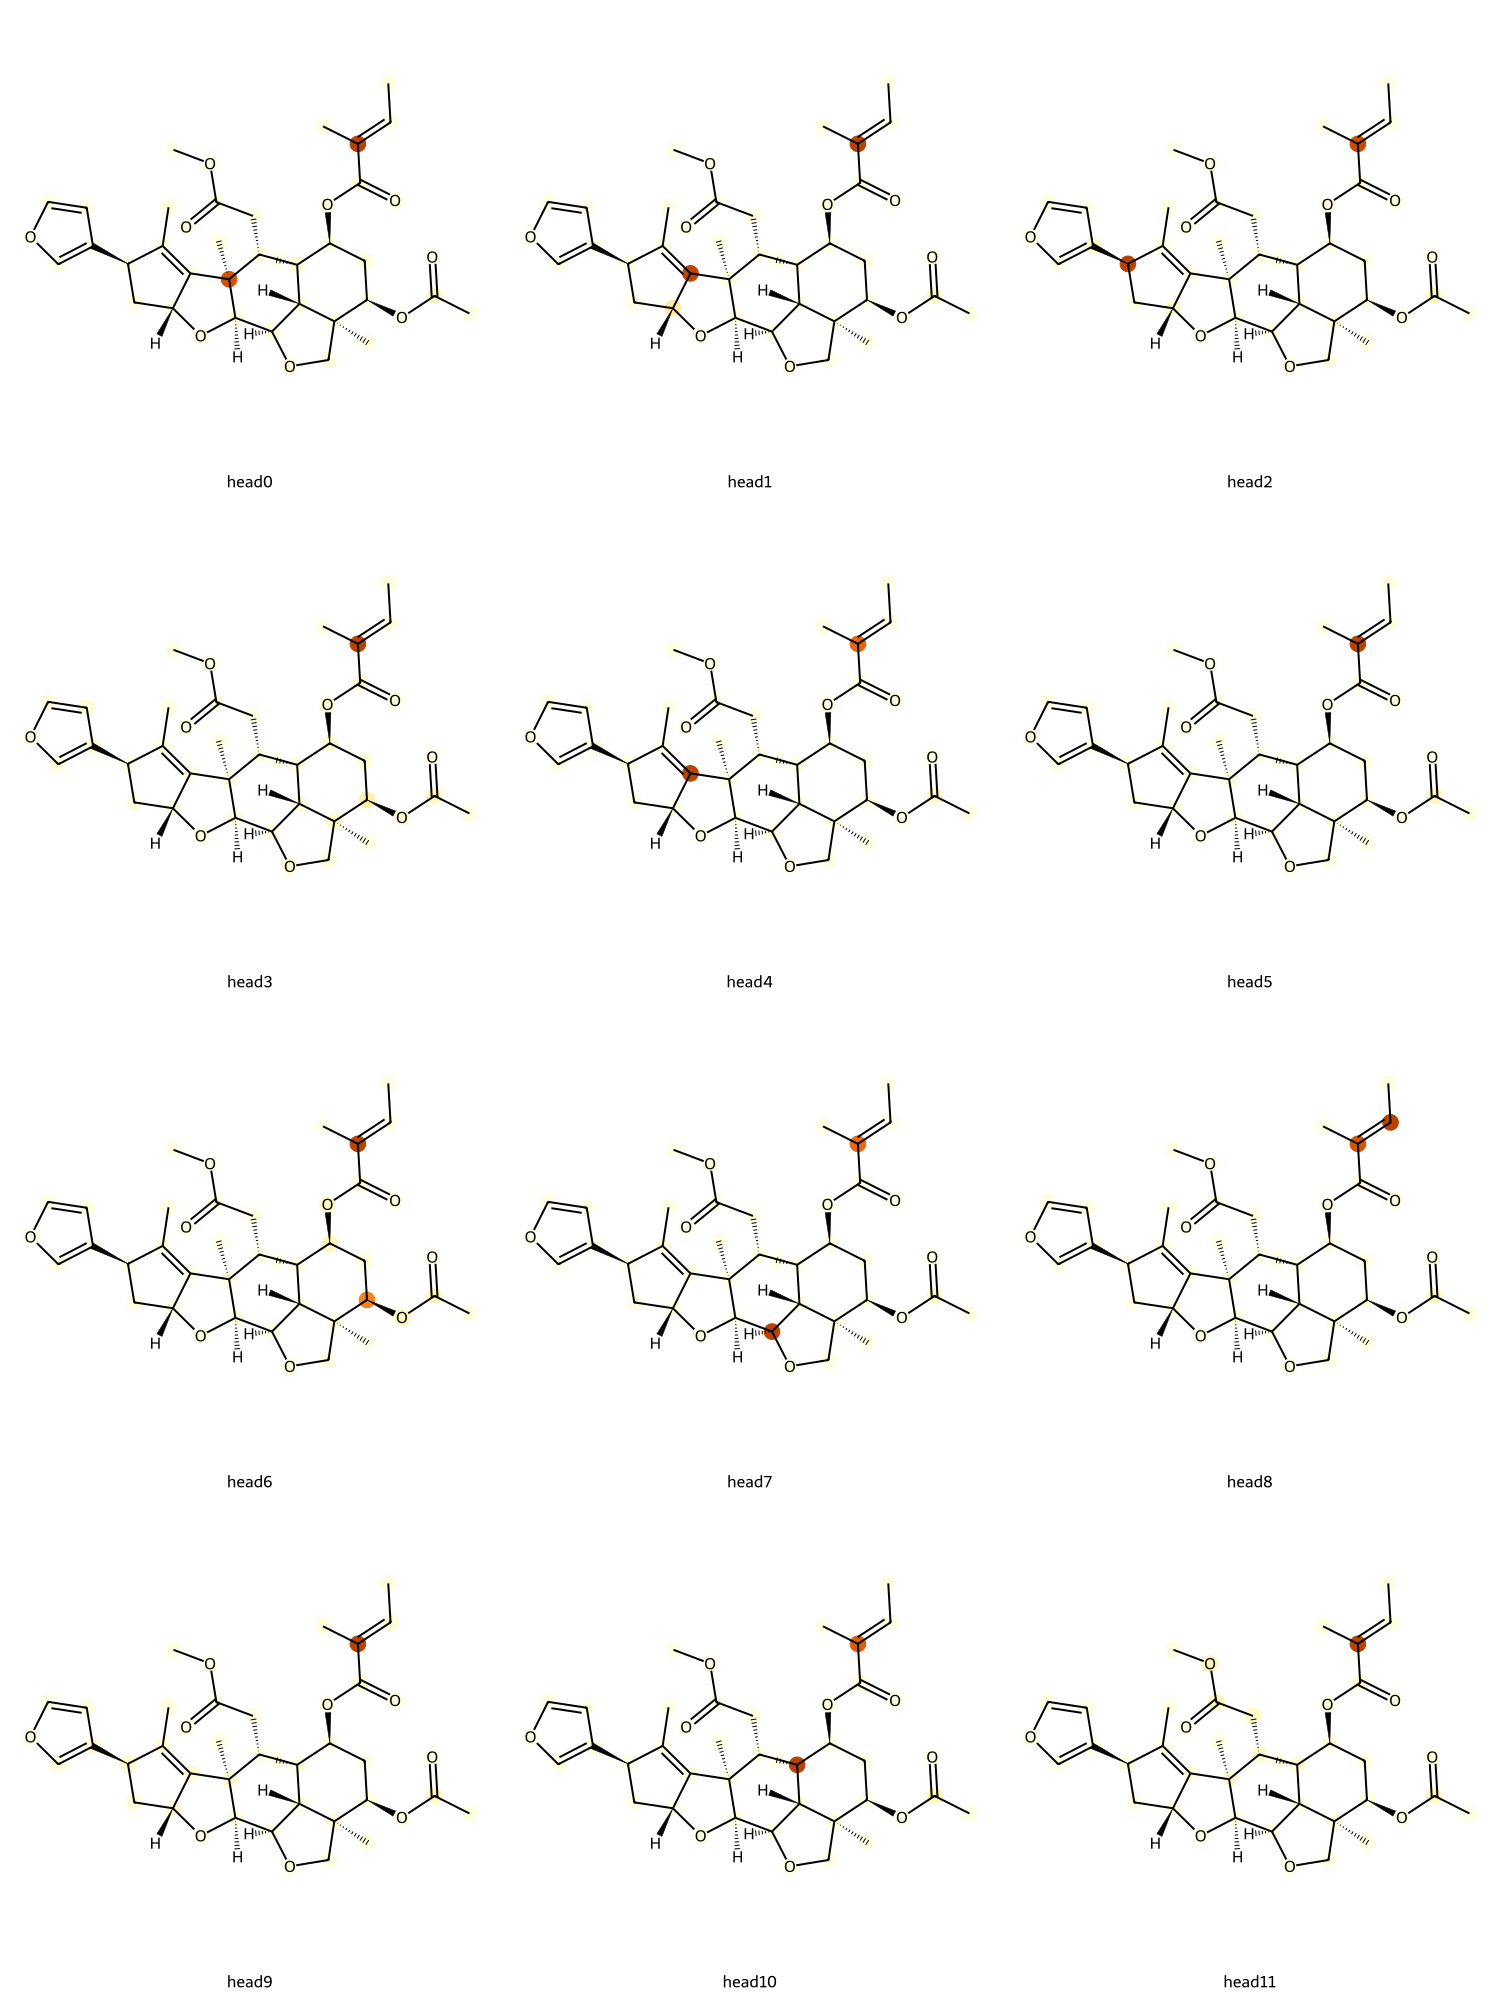

In [11]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.useBWAtomPalette()

import os
import sys
sys.path.append("/root/Open_DAIR_BioMed/open_biomed/")

import json
import torch
import torch.nn.functional as F
import matplotlib as mpl

from transformers import BertTokenizerFast
from torch_geometric.data import Batch

from models.drug_encoder.molfm import MolFM
from feat.drug_featurizer import DrugGraphFeaturizer
from feat.text_featurizer import TextTransformerTokFeaturizer

#smi = "CCCCC/C=C\C/C=C\C/C=C\C/C=C\CCCC(=O)C(F)(F)F"
smi = "C/C=C(\C)/C(=O)O[C@H]1C[C@H]([C@]2(CO[C@@H]3[C@@H]2[C@]1([C@H]([C@]4([C@@H]3O[C@H]5C4=C([C@@H](C5)C6=COC=C6)C)C)CC(=O)OC)C)C)OC(=O)C"
#text = "it is a fatty acid derivative that is arachidonic acid in which the OH part of the carboxy group has been replaced by a trifluoromethyl group It has a role as an EC 3.1.1.4 (phospholipase A2) inhibitor. It is an organofluorine compound, a ketone, an olefinic compound and a fatty acid derivative. It derives from an arachidonic acid. "
#text = "it derives from a arachidonic acid"
#text = "it contains a trifluoromethyl group"
#text = "it has a role as an EC 3.1.1.4 (phospholipase A2) inhibitor."
#text = "It is a ketone"
#text = "it is an olefinic compound"
#text = "it derives from a 2-aminopropan-1-ol"
text = "it has a role as an insect growth regulator, an antifeedant and a plant metabolite"
#text = "it is structurally related to lidocaine"
mol = DrugGraphFeaturizer({
    "name": "BaseGNN"
})(smi)
print(mol.edge_index)
mol = Batch.from_data_list([mol])
text_input = TextTransformerTokFeaturizer({
    "name": "TransformerTokenizer",
    "transformer_type": "bert",
    "max_length": 128,
    "model_name_or_path": "/root/Open_DAIR_BioMed/ckpts/text_ckpts/scibert_scivocab_uncased"
})(text)
tokenizer = BertTokenizerFast.from_pretrained("/root/Open_DAIR_BioMed/ckpts/text_ckpts/scibert_scivocab_uncased")
tokens = tokenizer.convert_ids_to_tokens(text_input["input_ids"])
print(text_input, tokens)
for key in text_input:
    text_input[key] = torch.tensor([text_input[key]])

model = MolFM({
    "gin_hidden_dim": 300,
    "gin_num_layers": 5,
    "drop_ratio": 0.0,
    "bert_config_path": "/root/Open_DAIR_BioMed/open_biomed/configs/mtr/kvplm_bert_config.json",
    "max_n_nodes": 128,
    "projection_dim": 256,
    "kge": {
        "n_ents": 49111,
        "n_rels": 16,
        "norm": 1,
        "hidden_size": 256,
        "margin": 1.0
    }
})
#state_dict = torch.load("/root/Open_DAIR_BioMed/ckpts/finetune_ckpts/molfm-paragraph-finetune.pth")["model_state_dict"]
state_dict = torch.load("/root/Open_DAIR_BioMed/ckpts/fusion_ckpts/molfm-ke/checkpoint_399.pth")["model"]
model.load_state_dict(state_dict)
result = model(mol, text_input, None, False, True)
attn = result["cross_attentions"][0].squeeze(0)
print(attn.shape)

mol = Chem.MolFromSmiles(smi)
#sents = [list(range(1, 12)), list(range(12, 30)), list(range(30, 52)), list(range(52, 64)), list(range(64, 67)), list(range(67, 72)), list(range(73, 77)), list(range(78, 84))]
sents = [list(range(len(tokens)))]
highlight_colors = []
attn = attn[:, 0]
#print(cur_attn)

for i in range(attn.shape[0]):
    cur_attn = attn[i] + attn[5]
    print(cur_attn)
    mn, mx = cur_attn.min(), cur_attn.max()
    cur_attn = (cur_attn - mn) / (mx - mn)
    #cur_attn = torch.mean(cur_attn, dim=0)
    cur_attn = cur_attn.detach().numpy()
    print(cur_attn)
    highlight_colors.append([mpl.colormaps['YlOrBr'](cur_attn[i] * 0.8)[:3] for i in range(mol.GetNumAtoms())])
img = Draw.MolsToGridImage(
    [mol for i in range(12)], 
    legends=['head' + str(i) for i in range(12)], 
    molsPerRow=3, 
    subImgSize=(500, 500), 
    highlightAtomLists=[list(range(mol.GetNumAtoms())) for i in range(12)], 
    highlightAtomColors=[dict(zip(list(range(mol.GetNumAtoms())), highlight_colors[i])) for i in range(12)],
    highlightBondLists=[[] for i in range(12)]
)
display(img)

CNCCC(C1=CC=CC=C1)OC2=CC=C(C=C2)C(F)(F)F C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@]2(C#C)O)CCC4=C3C=CC(=C4)OC C[C@@]1(CC[C@@H]2[C@@]1(C[C@H]([C@H]3[C@H]2CCC4=CC(=O)C(=C[C@]34C)C=O)O)C)O C1CN(P(=O)(OC1)NCCCl)CCCl
0 668 MESH:D000578
0 2593 MESH:D015842
0 667 MESH:D006146
0 2612 MESH:D011480
0 10171 MESH:D016670
0 4250 MESH:D004952
0 681 MESH:D004791
0 10172 MESH:D010195
0 955 MESH:D045504
0 8 MESH:D009930
0 9238 MESH:D010182
0 10173 MESH:D004211
0 4319 MESH:D010179
0 10174 MESH:D019851
0 1018 MESH:D020228
0 10175 MESH:D014361
0 4391 MESH:D002766
0 10176 MESH:D001550
0 10177 MESH:D001778
0 3749 MESH:D004066
0 40 MESH:D002264
0 682 MESH:D020164
0 3705 MESH:D006474
0 7482 MESH:D000681
0 1409 MESH:D004064
0 3857 MESH:D000208
0 4492 MESH:D005768
0 10178 MESH:D007611
0 2606 MESH:D000925
0 10179 MESH:D002108
0 2866 MESH:D006402
0 3452 MESH:D010335
0 1266 MESH:D000073566
0 1259 MESH:D008322
0 10180 MESH:D057057
0 2657 MESH:D006401
0 7641 MESH:D012697
0 1251 MESH:D014714
0 1252 MESH:D043344
0 3441 MESH:D

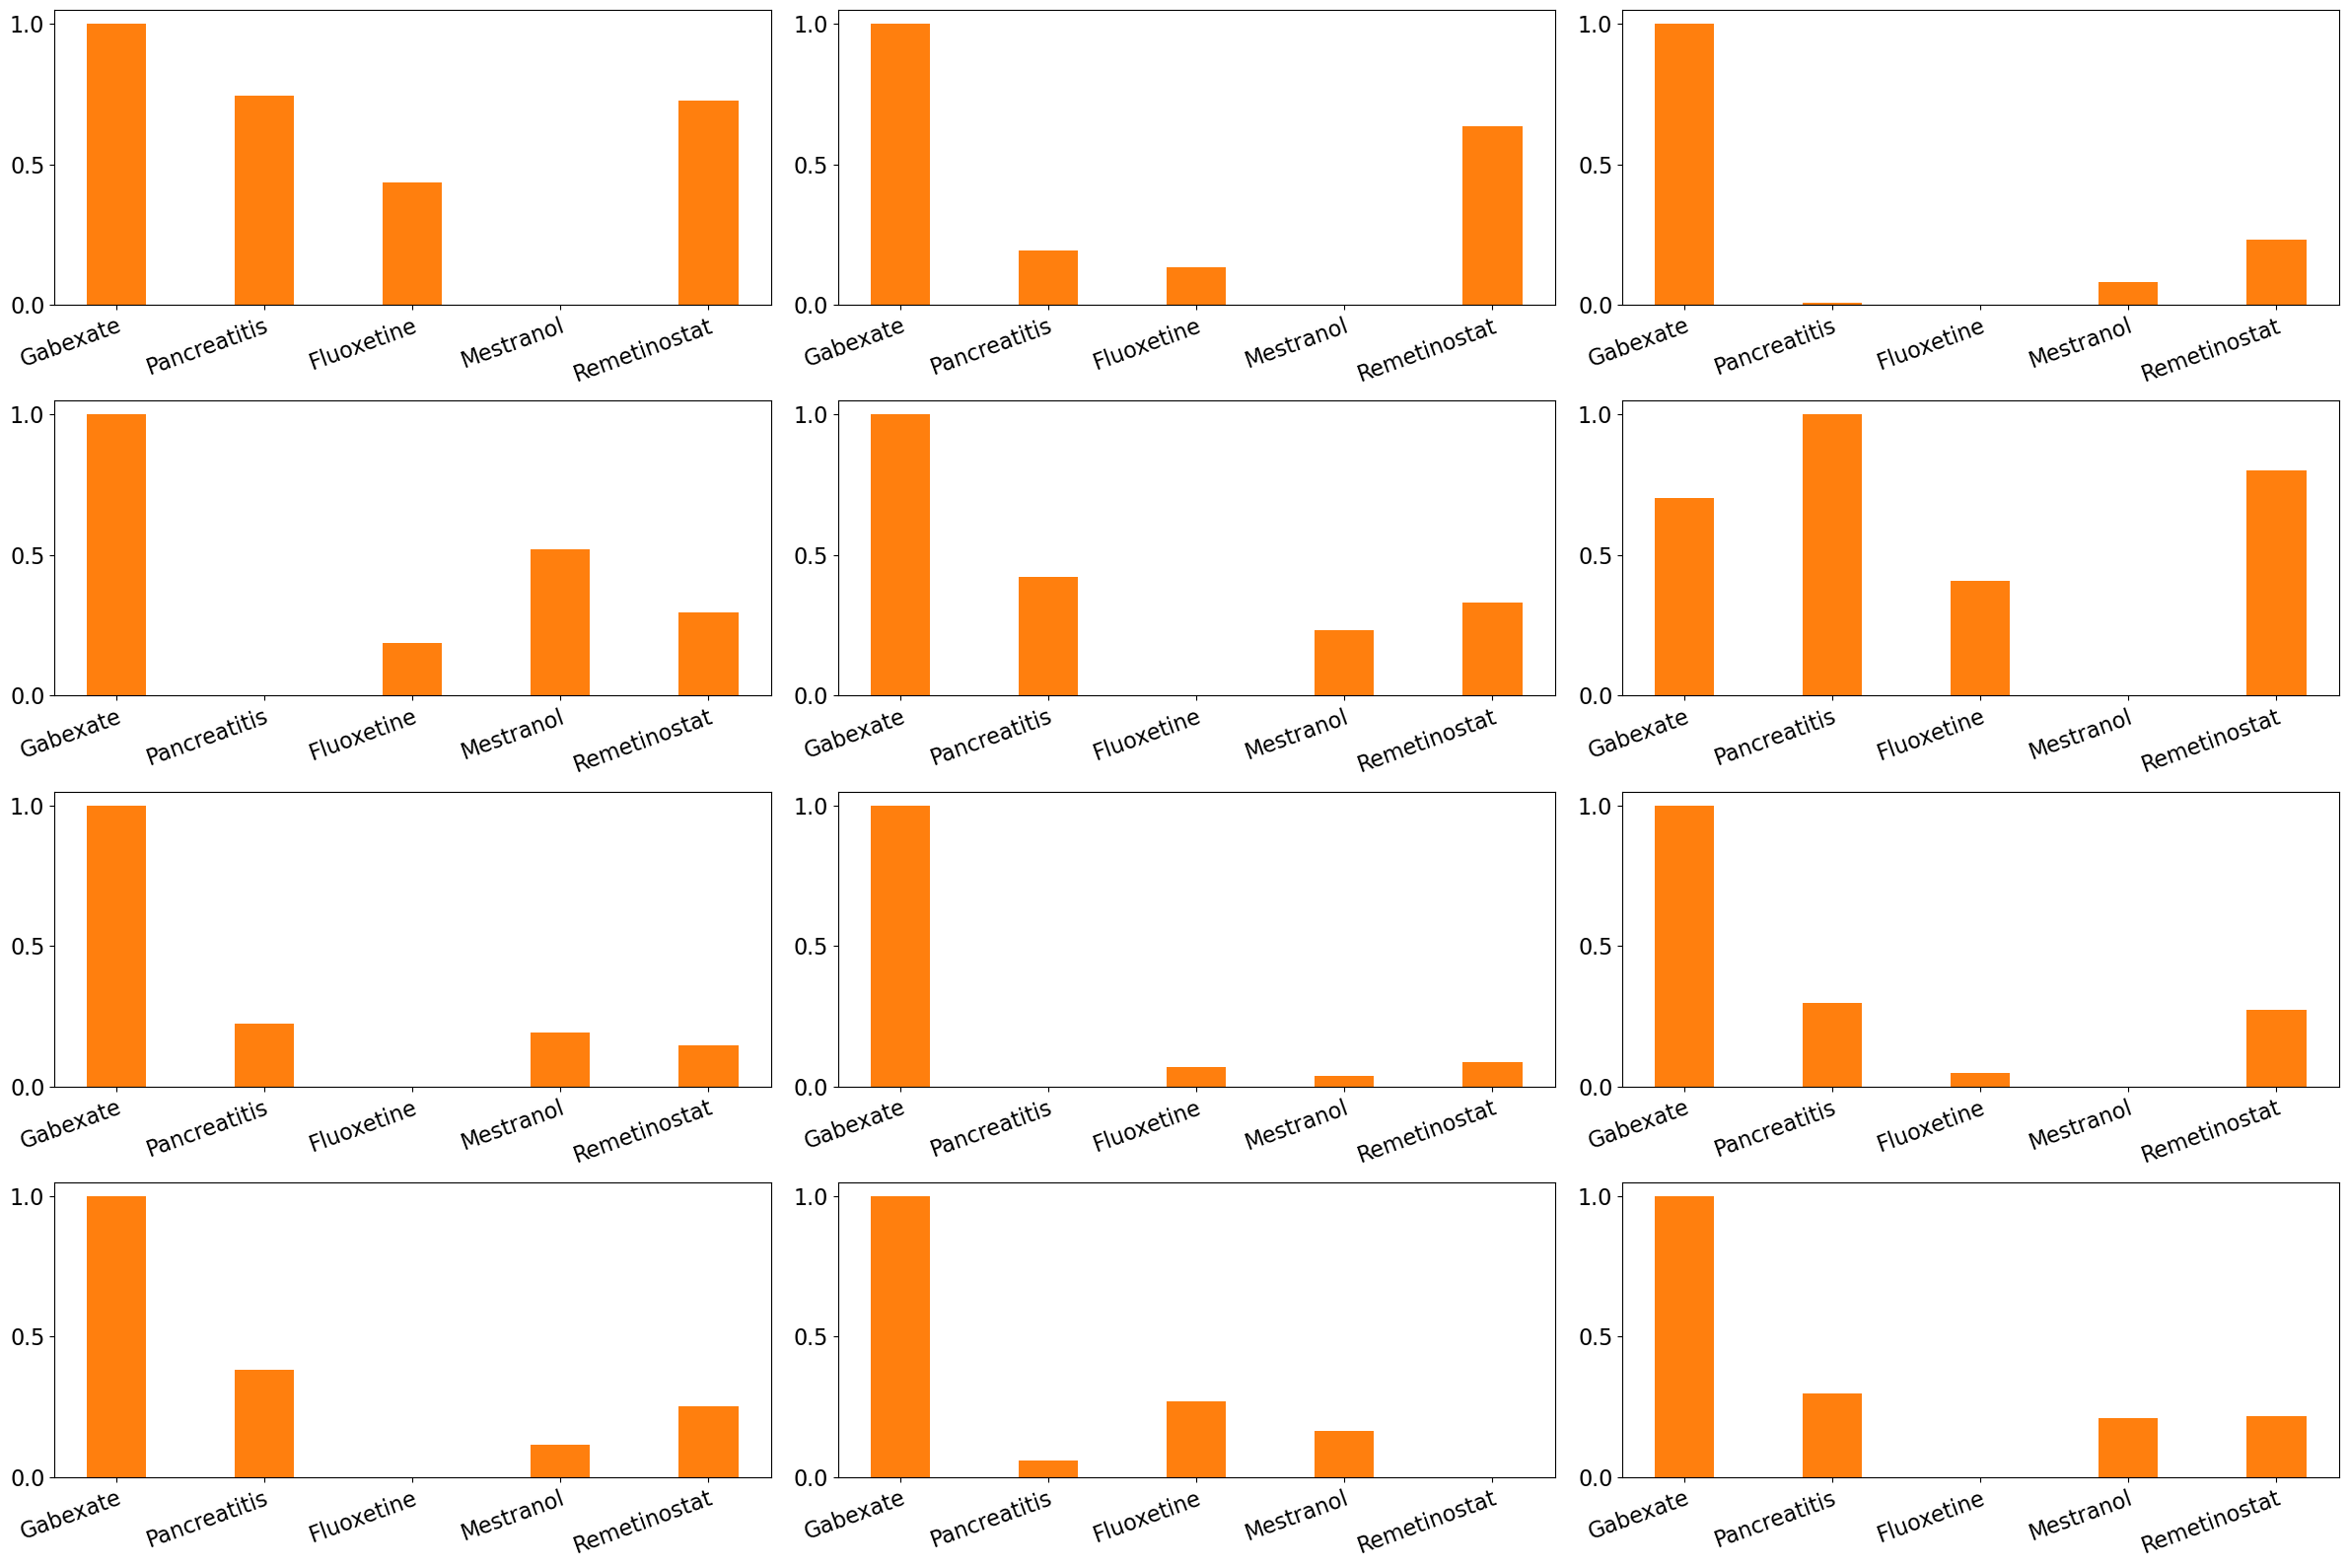

In [55]:
import pickle
import matplotlib.pyplot as plt
from rdkit import Chem

import os
import sys
sys.path.append("/root/Open_DAIR_BioMed/open_biomed/")

import numpy as np
import torch
from torch_geometric.data import Batch

from models.drug_encoder.molfm import MolFM
from feat.drug_featurizer import DrugGraphFeaturizer
from feat.text_featurizer import TextTransformerTokFeaturizer

def load_kg(path):
    data = pickle.load(open(path, "rb"))
    adj = {}
    for triplet in data["triplets"]:
        if triplet[0] not in adj:
            adj[triplet[0]] = [triplet]
        else:
            adj[triplet[0]].append(triplet)
        if triplet[2] not in adj:
            adj[triplet[2]] = [triplet]
        else:
            adj[triplet[2]].append(triplet)
    return adj, data

adj, data = load_kg("/share/project/molpretrain/data/kg/kg.pkl")
id2ent = {}
for ent in data["ent_dict"]:
    id2ent[data["ent_dict"][ent]] = ent
id2smiles = {}
with open("../../datasets/mtr/momu_pretrain/pair.txt", "r") as f:
    for line in f.readlines():
        line = line.rstrip("\n").split("\t")
        idx, smi = line[0], line[1]
        id2smiles[idx] = smi

"""
for k in adj:
    if len(adj[k]) > 10 and id2ent[k] in id2smiles:
        flag = False
        for e in adj[k]:
            if e[1] != 0 and e[1] != 15:
                flag = True
                break
        if flag:
            print(k, id2smiles[id2ent[k]])
"""

print(id2smiles['3386'], id2smiles['6291'], id2smiles['17150'], id2smiles['3690'])
for e in adj[10170]:
    if e[0] == 10170:
        print(e[1], e[2], id2ent[e[2]])

#text = "the molecule is similar to Remetinostat"
#text = "the molecule is used to treat pancreatitis"
text = "it increases the side effect of Fluoxetine"
#text = "The molecule decreases activities of Mestranol"
text_input = TextTransformerTokFeaturizer({
    "name": "TransformerTokenizer",
    "transformer_type": "bert",
    "max_length": 128,
    "model_name_or_path": "/root/Open_DAIR_BioMed/ckpts/text_ckpts/scibert_scivocab_uncased"
})(text)
for key in text_input:
    text_input[key] = torch.tensor([text_input[key]])
print(text_input)

smi = "CCOC(=O)C1=CC=C(C=C1)OC(=O)CCCCCN=C(N)N"
mol = Chem.MolFromSmiles(smi)
mol = DrugGraphFeaturizer({
    "name": "BaseGNN"
})(smi)
mol = Batch.from_data_list([mol])

kg = {
    "neigh_indice": torch.tensor([[10170, 10172, 25854, 25556, 48857]]),
    "neigh_attn": torch.tensor([[1, 1, 1, 1, 1]])
}

model = MolFM({
    "gin_hidden_dim": 300,
    "gin_num_layers": 5,
    "drop_ratio": 0.0,
    "bert_config_path": "/root/Open_DAIR_BioMed/open_biomed/configs/mtr/kvplm_bert_config.json",
    "max_n_nodes": 128,
    "projection_dim": 256,
    "kge": {
        "n_ents": 49111,
        "n_rels": 16,
        "norm": 1,
        "hidden_size": 256,
        "margin": 1.0
    }
})
state_dict = torch.load("/root/Open_DAIR_BioMed/ckpts/fusion_ckpts/molfm-ke-2/checkpoint_299.pth")["model"]
model.load_state_dict(state_dict)
with torch.no_grad():
    result = model(mol, text_input, kg, False, True)
attn = result["cross_attentions"][-1].squeeze(0)
print(attn.shape)
attn = attn[:, 0, -5:]
print(attn.shape)
fig = plt.figure(figsize=(24, 16))
for i in range(12):
    cur_attn = attn[i]
    mn, mx = cur_attn.min(), cur_attn.max()
    cur_attn = (cur_attn - mn) / (mx - mn)
    plt.subplot2grid((4, 3),(i // 3, i % 3))
    plt.bar(np.arange(5), cur_attn.numpy(), width=0.4, color='tab:orange')
    plt.xticks(np.arange(5), ('Gabexate', 'Pancreatitis', 'Fluoxetine', 'Mestranol', 'Remetinostat'), fontsize=16, rotation=20, ha='right', rotation_mode='anchor')
    plt.yticks(np.array([0, 0.5, 1]), fontsize=16)
fig.tight_layout()
plt.show()

tensor([0.0709, 0.1439, 0.9609, 0.0719, 0.0706, 0.0831, 0.0686, 0.0716, 0.0690,
        0.0730, 0.1783, 0.0729, 0.0906, 0.0728, 0.0743, 0.0926, 3.4656])


[07:31:32] WARNING: not removing hydrogen atom without neighbors
[07:31:32] WARNING: not removing hydrogen atom without neighbors
[07:31:32] WARNING: not removing hydrogen atom without neighbors
[07:31:33] WARNING: not removing hydrogen atom without neighbors
[07:31:33] WARNING: not removing hydrogen atom without neighbors
[07:31:33] WARNING: not removing hydrogen atom without neighbors
[07:31:33] WARNING: not removing hydrogen atom without neighbors


15613
49111
{'DRUG-DISEASE': 0, 'increased activities': 1, 'increase risk/severity of adverse effect': 2, 'increase of therapeutic efficacy': 3, 'decreased activities': 4, 'decrease of therapeutic efficacy': 5, 'increased metabolism': 6, 'decreased serum concentration': 7, 'increased serum concentration': 8, 'DRUG-DRUG': 9, 'decreased excretion rate, higher serum level': 10, 'increased excretion rate, lower serum level': 11, 'decreased metabolism': 12, 'decrease risk/severity of adverse effect': 13, 'DRUG-TARGET': 14, 'SIMILAR_TO': 15}


[07:31:37] WARNING: not removing hydrogen atom without neighbors
[07:31:37] WARNING: not removing hydrogen atom without neighbors
[07:31:37] WARNING: not removing hydrogen atom without neighbors
[07:31:37] WARNING: not removing hydrogen atom without neighbors
[07:31:37] WARNING: not removing hydrogen atom without neighbors
[07:31:38] WARNING: not removing hydrogen atom without neighbors
[07:31:38] WARNING: not removing hydrogen atom without neighbors


CC(=O)NC1C(C(C(OC1OP(=O)(O)OP(=O)(O)OCC2C(C(C(O2)N3C=CC(=O)NC3=O)O)O)CO)O)O CC(=O)N[C@@H]1[C@H]([C@@H]([C@H](O[C@H]1OP(=O)(O)OP(=O)(O)OC[C@@H]2[C@H]([C@H]([C@@H](O2)N3C=CC(=O)NC3=O)O)O)CO)O)O [-13.838586 -12.986129] [-13.838629 -13.04043 ] 0.05430128
CC(=O)N[C@@H]1[C@H]([C@@H]([C@H](O[C@H]1OP(=O)(O)OP(=O)(O)OC[C@@H]2[C@H]([C@H]([C@@H](O2)N3C=CC(=O)NC3=O)O)O)CO)O)O CC(=O)NC1C(C(C(OC1OP(=O)(O)OP(=O)(O)OCC2C(C(C(O2)N3C=CC(=O)NC3=O)O)O)CO)O)O [-13.838629 -13.04043 ] [-13.838586 -12.986129] 0.05430128
CC(=O)NC1C(C(C(OC1OP(=O)(O)OP(=O)(O)OCC2C(C(C(O2)N3C=CC(=O)NC3=O)O)O)CO)O)O CC(=O)N[C@@H]1[C@H]([C@H]([C@H](O[C@@H]1OP(=O)(O)OP(=O)(O)OC[C@@H]2[C@H]([C@H]([C@@H](O2)N3C=CC(=O)NC3=O)O)O)CO)O)O [-13.838586 -12.986129] [-13.795956 -13.13577 ] 0.1555949
CC(=O)N[C@@H]1[C@H]([C@H]([C@H](O[C@@H]1OP(=O)(O)OP(=O)(O)OC[C@@H]2[C@H]([C@H]([C@@H](O2)N3C=CC(=O)NC3=O)O)O)CO)O)O CC(=O)NC1C(C(C(OC1OP(=O)(O)OP(=O)(O)OCC2C(C(C(O2)N3C=CC(=O)NC3=O)O)O)CO)O)O [-13.795956 -13.13577 ] [-13.838586 -12.986129] 0.155594

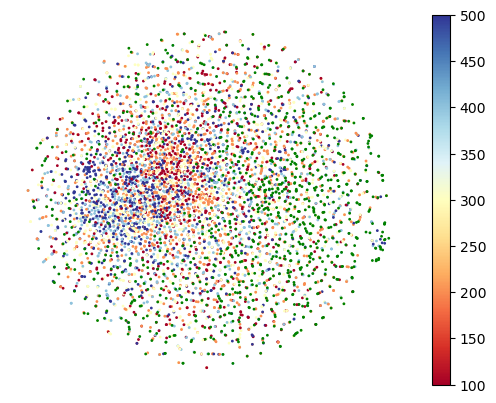

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import torch
import matplotlib as mpl
from rdkit import Chem, DataStructs
from rdkit.Chem import Draw, AllChem
from rdkit.Chem.Descriptors import ExactMolWt
from sklearn.manifold import TSNE
import random

#plt.figure(figsize=(15,15))

random.seed(42)
np.random.seed(42)
transe_params = torch.load("../../ckpts/kge/epoch699.pth", map_location="cpu")
kge_all = transe_params['ent_emb.weight'].numpy()
print(transe_params['rel_emb.weight'].norm(p=2, dim=1))

id2smiles = {}
with open("../../datasets/mtr/momu_pretrain/pair.txt", "r") as f:
    for line in f.readlines():
        line = line.rstrip("\n").split("\t")
        idx, smi = line[0], line[1]
        mol = Chem.MolFromSmiles(smi)
        if mol is not None:
            id2smiles[idx] = smi
print(len(id2smiles))

kg = pickle.load(open("/share/project/molpretrain/data/kg/kg.pkl", "rb"))
ents = kg["ent_dict"]
print(len(ents))
print(kg["rel_dict"])
mol_weights = np.zeros(len(ents))
cnt = 0
selected, unselected = [], []
for k in ents:
    if k in id2smiles:
        mol = Chem.MolFromSmiles(id2smiles[k])
        mol_weights[ents[k]] = ExactMolWt(mol)
        #mol_weights[ents[k]] = 0.8
        selected.append(ents[k])
    elif not k.startswith("DRUGBANK"):
        unselected.append(ents[k])
    else:
        x = random.randint(0, 10)
        if x >= 5:
            unselected.append(ents[k])

#print(selected, unselected)
selected = selected[:5000]
unselected = np.array(unselected)
perm = np.random.permutation(len(unselected))
idxs = selected + list(unselected[perm[:len(selected) // 5]])
#idxs = selected
#print(idxs)
kge = kge_all[idxs]
tsne = TSNE(n_components=2, random_state=42)
kge = tsne.fit_transform(kge)

cnt = 0
N = 0
sim_dist = 0
unsim_dist = 0
with open("/share/project/molpretrain/data/kg/sim_kg.txt") as f:
    for line in f.readlines():
        line = line.rstrip("\n").split("\t")
        h = ents[line[0]]
        t = ents[line[2]]
        cur = 0
        curn = 0
        for i in range(N % 20, len(ents) - N % 20, len(ents) // 20):
            cur += np.linalg.norm(kge_all[h] - kge_all[i], ord=2)
            curn += 1
        sim_dist += np.linalg.norm(kge_all[h] - kge_all[t], ord=2)
        unsim_dist += cur / curn
        N += 1
        if h in selected and t in selected and cnt <= 10 and np.linalg.norm(kge[selected.index(h)] - kge[selected.index(t)]) < 0.5 and np.linalg.norm(kge[selected.index(h)] - kge[selected.index(t)]) > 0:
            print(id2smiles[line[0]], id2smiles[line[2]], kge[selected.index(h)], kge[selected.index(t)], np.linalg.norm(kge[selected.index(h)] - kge[selected.index(t)]))
print(sim_dist / N, unsim_dist / N)

indexes = [[], [], [], [], [], []]
for i in idxs:
    if mol_weights[i] == 0:
        indexes[0].append(i)
    elif mol_weights[i] <= 120:
        indexes[1].append(i)
        mol_weights[i] = 100
    elif mol_weights[i] <= 180:
        indexes[2].append(i)
        mol_weights[i] = 200
    elif mol_weights[i] <= 260:
        indexes[3].append(i)
        mol_weights[i] = 300
    elif mol_weights[i] <= 360:
        indexes[4].append(i)
        mol_weights[i] = 400
    else:
        indexes[5].append(i)
        mol_weights[i] = 500
print([len(x) for x in indexes])

for i in range(len(idxs)):
    if kge[i][0] >= 43 and kge[i][1] >= -20 and kge[i][1] <= -10:
        x = random.randint(0, 5)
        if x < 4:
            kge[i][0] = 15 + random.randint(0, 100) / 10
            kge[i][1] = -5 + random.randint(0, 100) / 10
print(mol_weights[idxs])
sc = plt.scatter(kge[:len(selected), 0], kge[:len(selected), 1], s=1, c=mol_weights[selected], cmap=mpl.colormaps['RdYlBu'])
plt.scatter(kge[len(selected):, 0], kge[len(selected):, 1], s=1, c=[(0, 0.5, 0)] * (len(selected) // 5))
#plt.scatter([15.286115, 15.279163, -21.629204, -21.505081, -27.348085, -27.461945, 9.122984, 9.206772], [5.303254, 5.3019924, -14.348616, -14.488132, 7.2253103, 7.335349, -17.803703, -18.060122], s=10, c=[(0, 0, 0)] * 8)
plt.colorbar(sc)
plt.axis('off')
plt.show()


In [15]:
import numpy as np
import pickle

def load_kg(path):
    data = pickle.load(open(path, "rb"))
    adj = {}
    for triplet in data["triplets"]:
        if triplet[0] not in adj:
            adj[triplet[0]] = [triplet]
        else:
            adj[triplet[0]].append(triplet)
        if triplet[2] not in adj:
            adj[triplet[2]] = [triplet]
        else:
            adj[triplet[2]].append(triplet)
    return adj, data
"""
transe_params = torch.load("../../ckpts/kge/epoch699.pth", map_location="cpu")
kge1 = transe_params['ent_emb.weight'].numpy()[idxs]
kge1 = tsne.fit_transform(kge1)
sc = plt.scatter(kge1[:len(selected), 0], kge1[:len(selected), 1], s=1, c=mol_weights[selected], cmap=mpl.colormaps['RdYlBu'])
plt.scatter(kge1[len(selected):, 0], kge1[len(selected):, 1], s=1, c=[(0, 0.5, 0)] * (len(selected) // 4))
plt.colorbar(sc)
plt.axis('off')
plt.show()
"""
adj, data = load_kg("/share/project/molpretrain/data/kg/kg.pkl")
x, y, z = 0, 0, 0
for k in data['ent_dict']:
    if k.startswith("DB"):
        x += 1
    elif k.startswith("MESH"):
        y += 1
    else:
        z += 1
print(x, y, z)
a = np.zeros(16, dtype=int)
for d in data["triplets"]:
    a[d[1]] += 1
print(data["rel_dict"], a)

14809 19665 14637
{'DRUG-DISEASE': 0, 'increased activities': 1, 'increase risk/severity of adverse effect': 2, 'increase of therapeutic efficacy': 3, 'decreased activities': 4, 'decrease of therapeutic efficacy': 5, 'increased metabolism': 6, 'decreased serum concentration': 7, 'increased serum concentration': 8, 'DRUG-DRUG': 9, 'decreased excretion rate, higher serum level': 10, 'increased excretion rate, lower serum level': 11, 'decreased metabolism': 12, 'decrease risk/severity of adverse effect': 13, 'DRUG-TARGET': 14, 'SIMILAR_TO': 15} [4.997450e+05 2.974380e+05 1.044749e+06 4.649200e+04 8.271200e+04
 2.111080e+05 1.109580e+05 2.504800e+04 7.953600e+04 4.833800e+04
 3.901200e+05 5.676800e+04 2.880100e+05 8.800000e+02 2.387000e+04
 9.580400e+04]


In [2]:
a={'mrr_d2t': 0.379684104051647, 'mrr_t2d': 0.390048352158235, 'rec@1_d2t': 0.27980206927575346, 'rec@1_t2d': 0.2919478182636077, 'rec@5_d2t': 0.4916779127305443, 'rec@5_t2d': 0.4916779127305443, 'rec@10_d2t': 0.5721997300944669, 'rec@10_t2d': 0.5748987854251012}
b={'mrr_d2t': 0.3861342140799406, 'mrr_t2d': 0.39688210821950115, 'rec@1_d2t': 0.2838506522717049, 'rec@1_t2d': 0.2964462438146649, 'rec@5_d2t': 0.50472334682861, 'rec@5_t2d': 0.5056230319388214, 'rec@10_d2t': 0.5897435897435898, 'rec@10_t2d': 0.5879442195231669}
c={'mrr_d2t': 0.3956, 'mrr_t2d': 0.3934, 'rec@1_d2t': 0.2976, 'rec@1_t2d': 0.2939, 'rec@5_d2t': 0.5053, 'rec@5_t2d': 0.5026, 'rec@10_d2t': 0.5863, 'rec@10_t2d': 0.5849}
for key in a:
    print(key, c[key] - b[key] + a[key])

mrr_d2t 0.3891498899717064
mrr_t2d 0.3865662439387339
rec@1_d2t 0.2935514170040485
rec@1_t2d 0.2894015744489428
rec@5_d2t 0.4922545659019343
rec@5_t2d 0.4886548807917229
rec@10_d2t 0.5687561403508772
rec@10_t2d 0.5718545659019343
